# Supervised Learning - Foundations: ReCell 

***Marks: 60***

# Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
# Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
# Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

# Importing necessary libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Overview

- Observations
- Sanity checks

In [2]:
data = pd.read_csv('used_device_data.csv')

In [3]:
data.shape

(3454, 15)

In [4]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns")

There are 3454 rows and 15 columns


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


In [6]:
data.sample(10, random_state=2)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
1207,HTC,Android,12.70,no,no,8.0,5.0,32.0,4.0,2100.0,160.00,2014,1044,190.05,70.70
143,Samsung,Android,20.32,yes,no,5.0,2.0,16.0,1.5,4200.0,313.00,2015,909,210.23,75.65
3202,Huawei,Android,16.69,yes,yes,10.5,16.0,128.0,8.0,4000.0,178.00,2020,221,469.87,128.57
1127,Honor,Android,10.29,no,no,8.0,2.0,32.0,4.0,1730.0,159.00,2015,894,69.98,48.57
2926,Xiaomi,Android,14.83,yes,no,13.0,8.0,64.0,4.0,3000.0,150.00,2018,446,169.30,105.80
1726,LG,Android,7.67,no,no,2.0,1.3,16.0,4.0,1540.0,140.45,2014,952,61.35,29.49
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.00,2019,316,99.70,95.13
3273,Sony,Android,15.37,yes,yes,NaN,8.0,256.0,8.0,4000.0,181.40,2020,236,934.15,240.67
1411,Others,Others,19.94,no,no,5.0,2.0,32.0,4.0,4450.0,384.00,2014,767,170.81,78.89
551,Alcatel,Android,10.29,no,no,5.0,0.3,16.0,4.0,1800.0,157.00,2013,921,99.85,51.29


Looking at the sample and the info, I see that there are 4 object columns and two integer columns. One of these integers is release year, so I'll likely want to convert that to date time. For the object columns I'm going to look into converting these to dummy variables (upon further inspection, it appears a phone can be both 4g and 5g, so I won't be able to use dummy variables to get rid of one of these columns). I'm also initially unsure of the units on the screen size, battery and weight columns, so for my own knowledge I'll want to look into those to give me a better intuitive understanding of the data set.

In [7]:
df = data.copy()

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

The number of missing values is relatively low, with only the main_camera_mp being above 7 total. Even for that column, there are 179 NaN values out of nearly 3500 rows, so about 95% of those entries have values. We'll still want to investigate these values to see if we can replace them or if there's any pattern to which entries they're missing for.

# Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the price of a used device?

In [10]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


In [11]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Question 1 Used Price

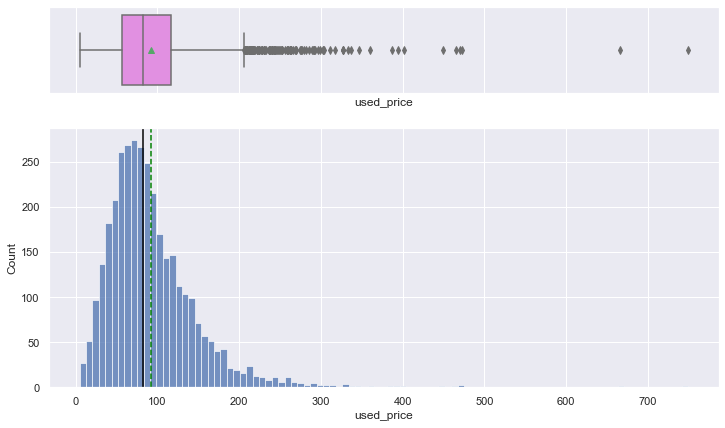

In [13]:
histogram_boxplot(df, "used_price")

In [14]:
df["used_price_log"] = np.log(df["used_price"])

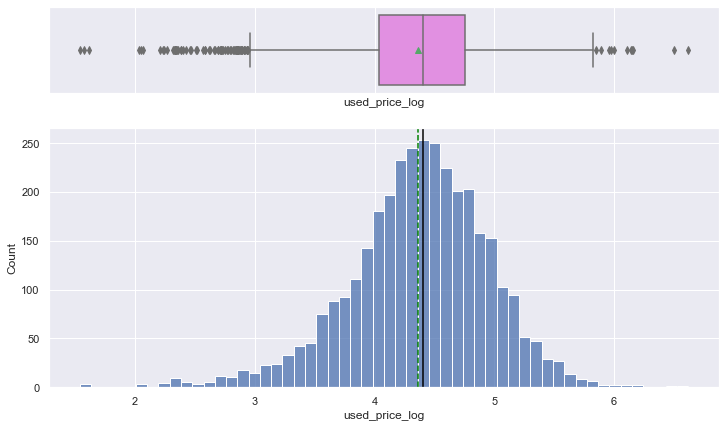

In [15]:
histogram_boxplot(df, "used_price_log")

Taking the log of the used price makes the distribution much closer to normal.

## Question 2 What % of Used Devices are Android OS

In [16]:
df.value_counts('os')

os
Android    3214
Others      137
Windows      67
iOS          36
dtype: int64

In [17]:
df.value_counts('os', normalize = True).mul(100).round(0)

os
Android    93.0
Others      4.0
Windows     2.0
iOS         1.0
dtype: float64

93% of the used devices in our data set run on the Android OS.

## Question 3 How does RAM vary by brand?

In [18]:
grouped_df = df.groupby('brand_name')

In [19]:
grouped_df1 = grouped_df.ram.mean().round(2).sort_values(ascending=False)
print(grouped_df1)

brand_name
OnePlus       6.36
Oppo          4.96
Vivo          4.76
Huawei        4.66
Honor         4.60
Xiaomi        4.58
Google        4.53
Meizu         4.45
Samsung       4.20
Realme        4.20
Sony          4.07
Asus          4.05
ZTE           4.02
HTC           4.00
Apple         4.00
XOLO          4.00
Microsoft     4.00
Panasonic     4.00
Coolpad       3.95
LG            3.94
Motorola      3.94
Gionee        3.93
Acer          3.90
Lenovo        3.89
BlackBerry    3.83
Others        3.78
Spice         3.75
Micromax      3.68
Alcatel       3.41
Karbonn       3.35
Lava          3.28
Infinix       2.60
Nokia         2.42
Celkon        1.61
Name: ram, dtype: float64


In [20]:
grouped_df1.describe()

count    34.000000
mean      3.961765
std       0.787376
min       1.610000
25%       3.792500
50%       4.000000
75%       4.200000
max       6.360000
Name: ram, dtype: float64

Average RAM varies widely by brand, from a minimum of 1.61 for Celkon phones to a maximum of 6.36 for OnePlus. The average is very near 4.0 with a std of .787. The IQR is 3.79 to 4.2, which means we have multiple outliers on both sides of the distribution

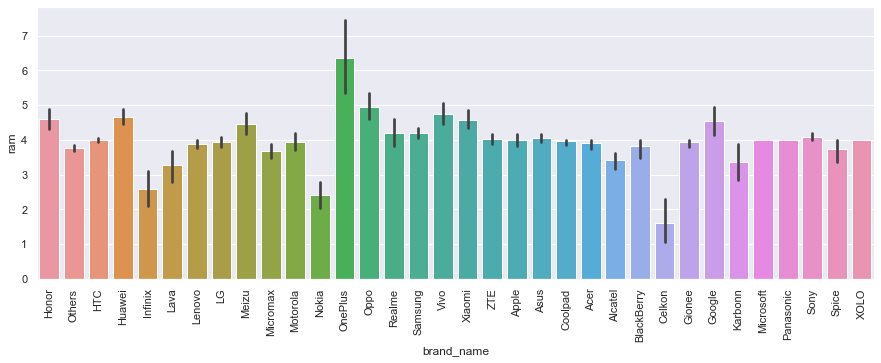

In [21]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

## Question 4 How does weight vary on phones with at least 4500 mAh (battery)?

In [22]:
large_batt_df = df[df.battery > 4500]

In [23]:
large_batt_df.weight.describe()

count    341.000000
mean     332.275660
std      155.501832
min      118.000000
25%      198.000000
50%      300.000000
75%      467.000000
max      855.000000
Name: weight, dtype: float64

In [24]:
df.weight.describe()

count    3447.000000
mean      182.751871
std        88.413228
min        69.000000
25%       142.000000
50%       160.000000
75%       185.000000
max       855.000000
Name: weight, dtype: float64

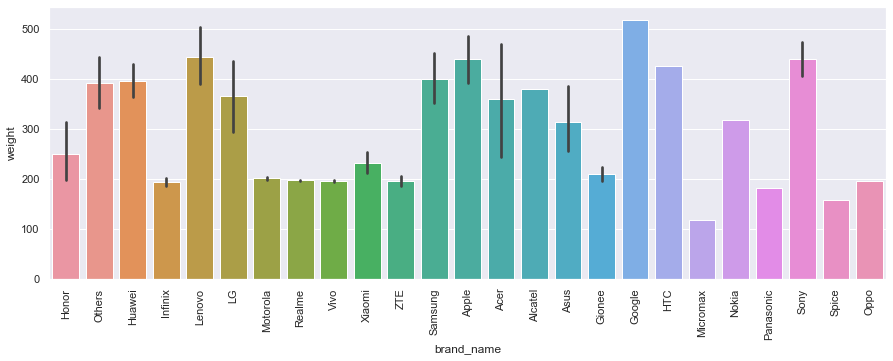

In [25]:
plt.figure(figsize=(15, 5))
sns.barplot(data=large_batt_df, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

For phones with large batteries, the mean weight is 332 which is nearly twice as large as the entire data set mean. The IQR ranges from 198 to 467, so the 25th percentile weight on phones with large batteries is above the 75th percentile weight of all the phones in the data set. Based on this, I expect weight and battery size to be highly correlated.

## Question 5 How many phones for each brand have at least a 6 inch screen?

In [26]:
large_screen_df = df[df.screen_size >= 6 * 2.54] # multiplying by 2.54 to convert to inches

In [27]:
large_screen_df.brand_name.value_counts()

Huawei       157
Samsung      131
Others       118
Vivo          82
Oppo          78
Lenovo        76
Honor         72
Xiaomi        69
LG            63
Asus          51
Motorola      43
Realme        41
Alcatel       34
ZTE           25
Apple         24
Sony          23
Meizu         21
Acer          20
Nokia         19
OnePlus       16
HTC           14
Micromax      11
Infinix       10
Gionee         8
Google         7
XOLO           4
Panasonic      3
Coolpad        3
Karbonn        2
Spice          2
Microsoft      1
Name: brand_name, dtype: int64

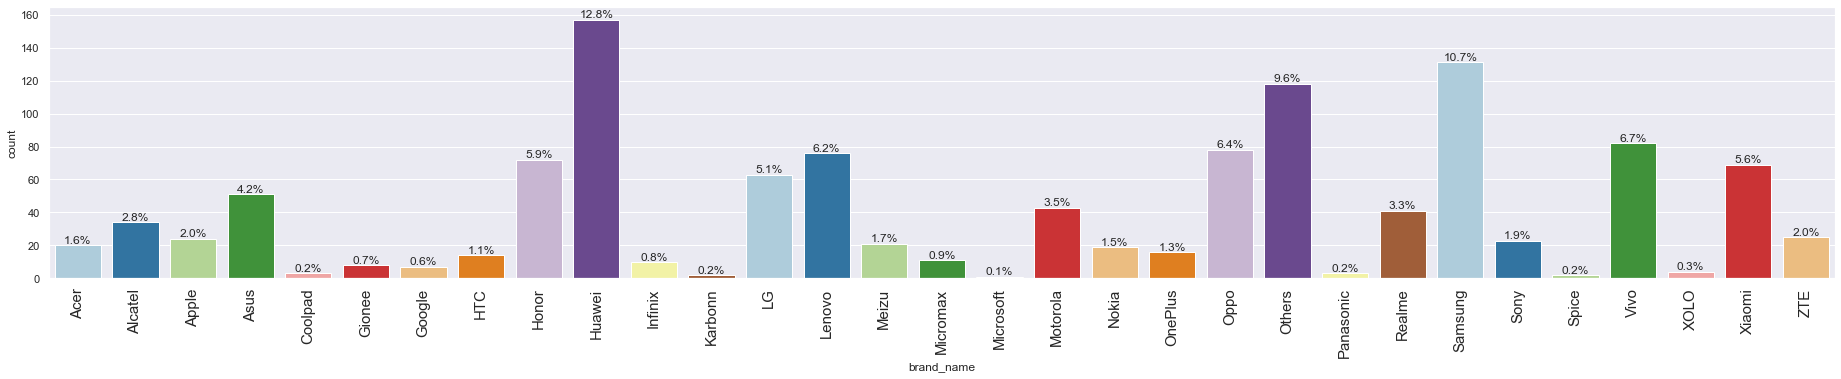

In [28]:
labeled_barplot(large_screen_df, "brand_name", perc = True)

Huawei has the most large screen phones of any brand in this data set, although there are 479 listed as "other". Each brand has at least 1 phone with a 6 inch screen or larger.

## Question 6 What's the distribution of budget phones that have a greater than 8mp selfie camera by brand?

In [29]:
good_selfie_df = df[df.selfie_camera_mp > 8.0]
good_selfie_df.brand_name.value_counts()

Huawei        87
Vivo          78
Oppo          75
Xiaomi        63
Samsung       57
Honor         41
Others        34
LG            32
Motorola      26
Meizu         24
HTC           20
ZTE           20
Realme        18
OnePlus       18
Lenovo        14
Sony          14
Nokia         10
Asus           6
Infinix        4
Gionee         4
Coolpad        3
BlackBerry     2
Micromax       2
Panasonic      2
Acer           1
Name: brand_name, dtype: int64

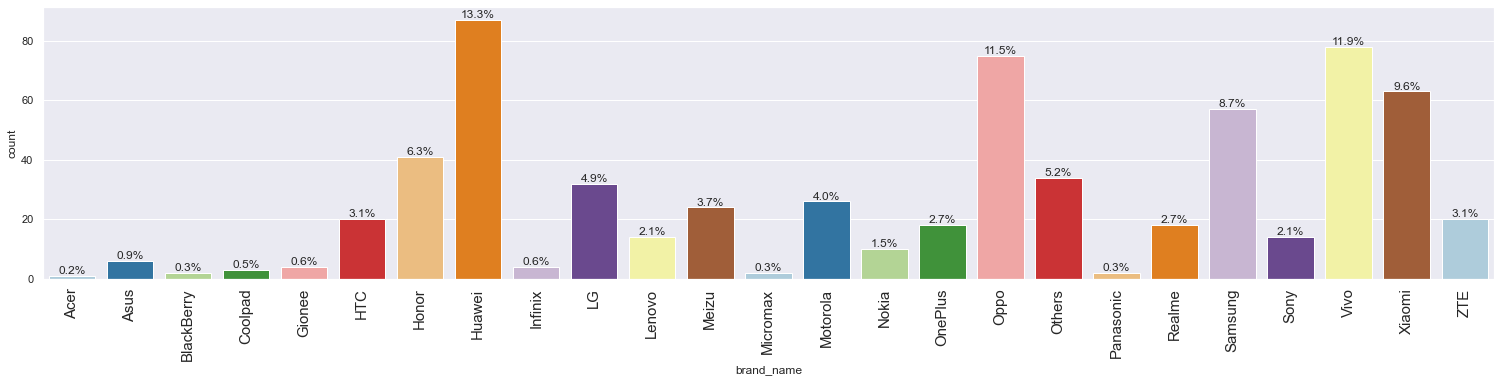

In [30]:
labeled_barplot(good_selfie_df, "brand_name", perc = True)

The brands with the most devices that have high end selfie cameras are Huawei, Vivo, Oppo, Xiaomi and Samsung.

## Question 7 Which attributes are most highly correlated with used phone price?

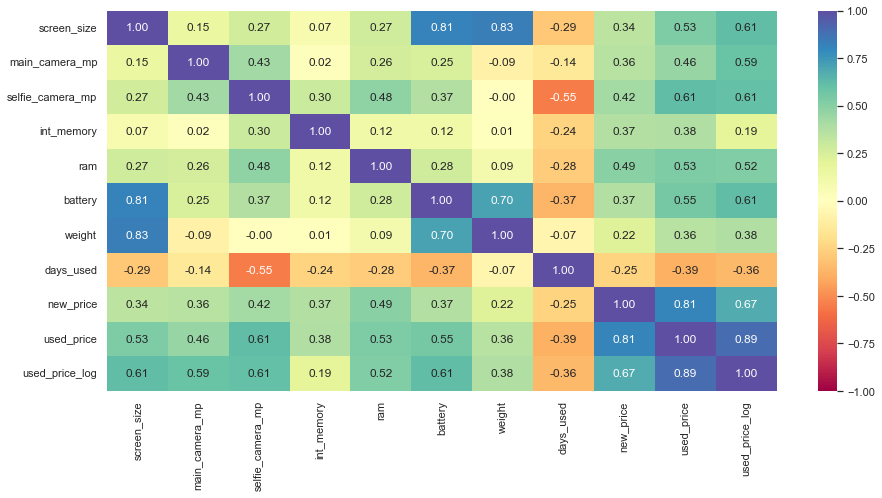

In [31]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

cols_list.remove("release_year") # dropping release_year because it's a date

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

The variable most highly correlated with used price is the new price of the phone. After that the selfie camera mp, battery, ram and screen size are also highly correlated with the used price. The only variable with a negative correlation is days_used, which makes intuitive sense because that means that older phones are cheaper than less used ones.

## Additional EDA

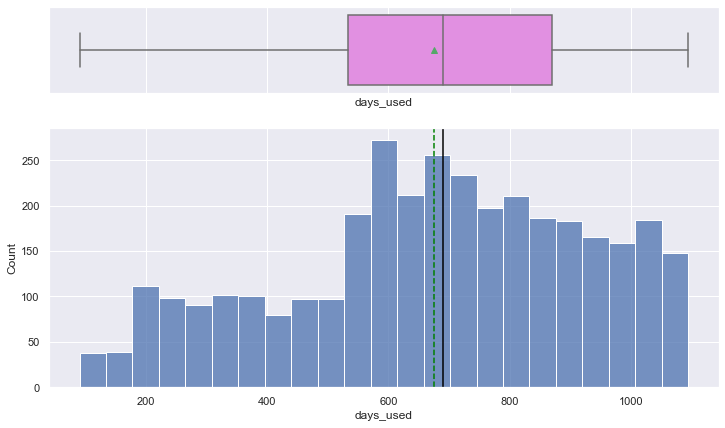

In [32]:
histogram_boxplot(df, "days_used")

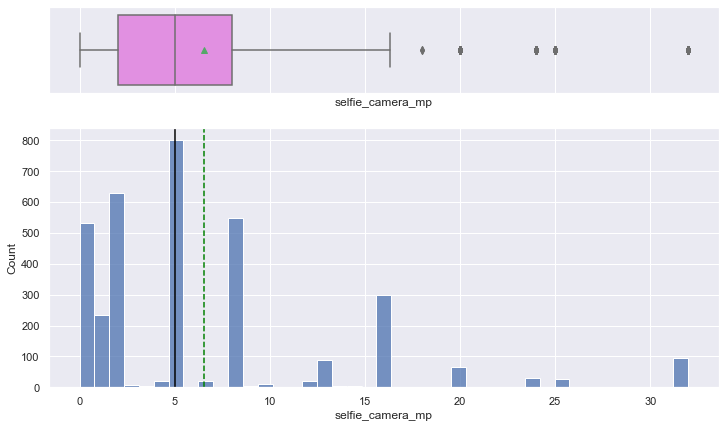

In [33]:
histogram_boxplot(df, "selfie_camera_mp")

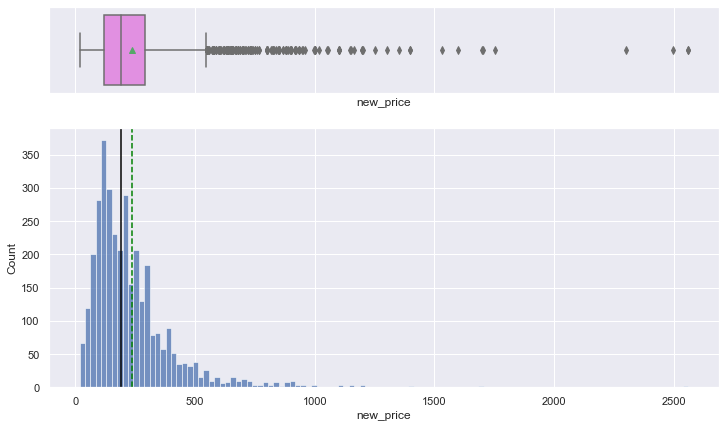

In [34]:
histogram_boxplot(df, "new_price")

In [35]:
df["new_price_log"] = np.log(df["new_price"])

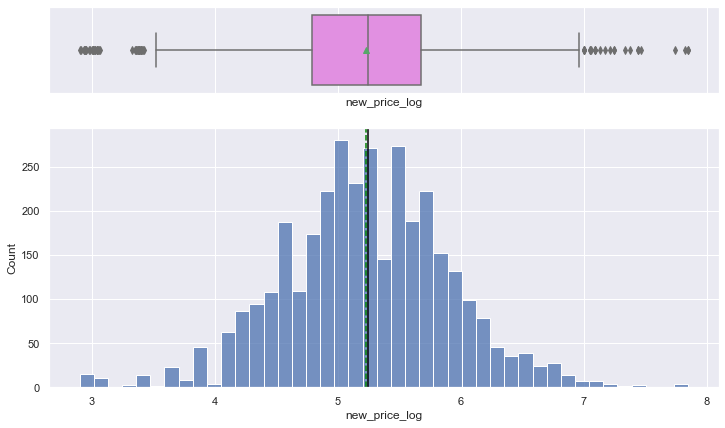

In [36]:
histogram_boxplot(df, "new_price_log")

Similar to Used price, taking the log of new price gets us a distribution much closer to normal

# Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## Missing Value Treatment

In [37]:
df1 = df.copy()

In [38]:
df1.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
used_price_log        0
new_price_log         0
dtype: int64

In [39]:
# creating list of columns with nulls
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

# for loop to fill na's based on median of the column when grouped by brand name and release year
for col in cols_impute:
    df1[col] = df1.groupby(['brand_name','release_year'])[col].transform(
        lambda x: x.fillna(x.median())
    )

In [40]:
df1.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            0
ram                   0
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
used_price_log        0
new_price_log         0
dtype: int64

In [41]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

# for loop to fill na's based on median of the column when grouped by brand name
for col in cols_impute:
    df1[col] = df1.groupby('brand_name')[col].transform(
        lambda x: x.fillna(x.median())
    )

In [42]:
df1.isnull().sum()

brand_name           0
os                   0
screen_size          0
4g                   0
5g                   0
main_camera_mp      10
selfie_camera_mp     0
int_memory           0
ram                  0
battery              0
weight               0
release_year         0
days_used            0
new_price            0
used_price           0
used_price_log       0
new_price_log        0
dtype: int64

In [43]:
# making sure main_camera_mp is a float variable
df1['main_camera_mp'] = pd.to_numeric(df1['main_camera_mp'],errors = 'coerce')

In [44]:
# fill remaining main_camera_mp nulls with column median
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

In [45]:
df1.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
used_price_log      0
new_price_log       0
dtype: int64

In [46]:
df1.describe(include = 'all')

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log
count,3454,3454,3454.000000,3454,3454,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
unique,34,4,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Others,Android,NaN,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,502,3214,NaN,2335,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,13.713115,NaN,NaN,9.617597,6.555067,54.528474,4.032620,3132.577446,182.636856,2015.965258,674.869716,237.038848,92.302936,4.364712,5.233107
std,NaN,NaN,3.805280,NaN,NaN,4.749438,6.968440,84.934991,1.368598,1298.884193,88.360445,2.298455,248.580166,194.302782,54.701648,0.588914,0.683637
min,NaN,NaN,5.080000,NaN,NaN,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,18.200000,4.650000,1.536867,2.901422
25%,NaN,NaN,12.700000,NaN,NaN,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,120.342500,56.482500,4.033931,4.790342
50%,NaN,NaN,12.830000,NaN,NaN,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,189.785000,81.870000,4.405133,5.245892
75%,NaN,NaN,15.340000,NaN,NaN,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,291.115000,116.245000,4.755700,5.673718


## Outlier Detection

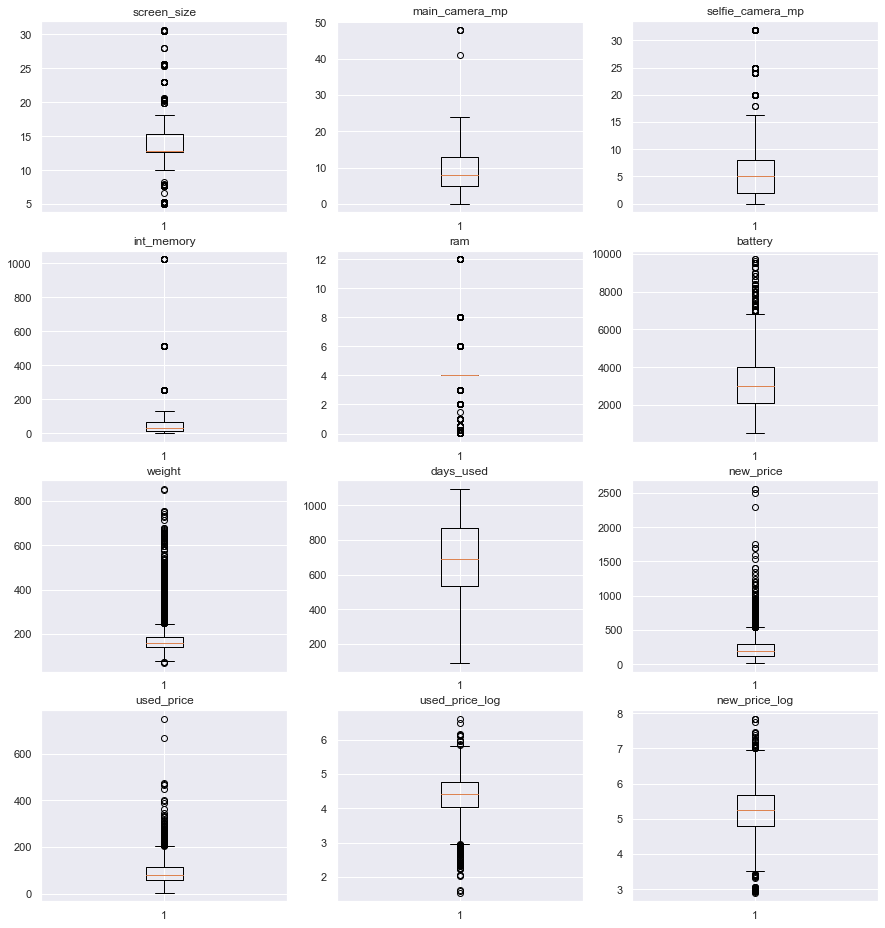

In [47]:
# creating a list of numeric columns
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it's a date
numeric_columns.remove("release_year")

plt.figure(figsize=(15, 50))

for i, variable in enumerate(numeric_columns):
    plt.subplot(12, 3, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.title(variable)

plt.show()

There are a significant number of outliers in almost every numeric column, so I'm going to look through each to determine how we should treat them. For the screen size, main camera mp, selfie camera mp and internal memory I'm planning to treat the outliers because for screen size they're somewhat evenly distributed around the mean and for the selfie mp and internal memory there are very few so capping them shouldn't impact our model significantly.

For all other variables I won't treat the outliers because removing them would meaningfully change the distribution.

In [48]:
def treat_outliers(df1, col):
    """
    Treats outliers in a variable
    df1: dataframe
    col: dataframe column
    """
    Q1 = df1[col].quantile(0.25)  # 25th percentile
    Q3 = df1[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df1[col] = np.clip(df1[col], Lower_Whisker, Upper_Whisker)

    return df1

col_list = [
    "selfie_camera_mp",
    "main_camera_mp",
    "int_memory",
    "screen_size"
]

def treat_outliers_all(df1, col_list):
    for c in col_list:
        df = treat_outliers(df1, c)

    return df

In [49]:
df2 = treat_outliers_all(df1, col_list)

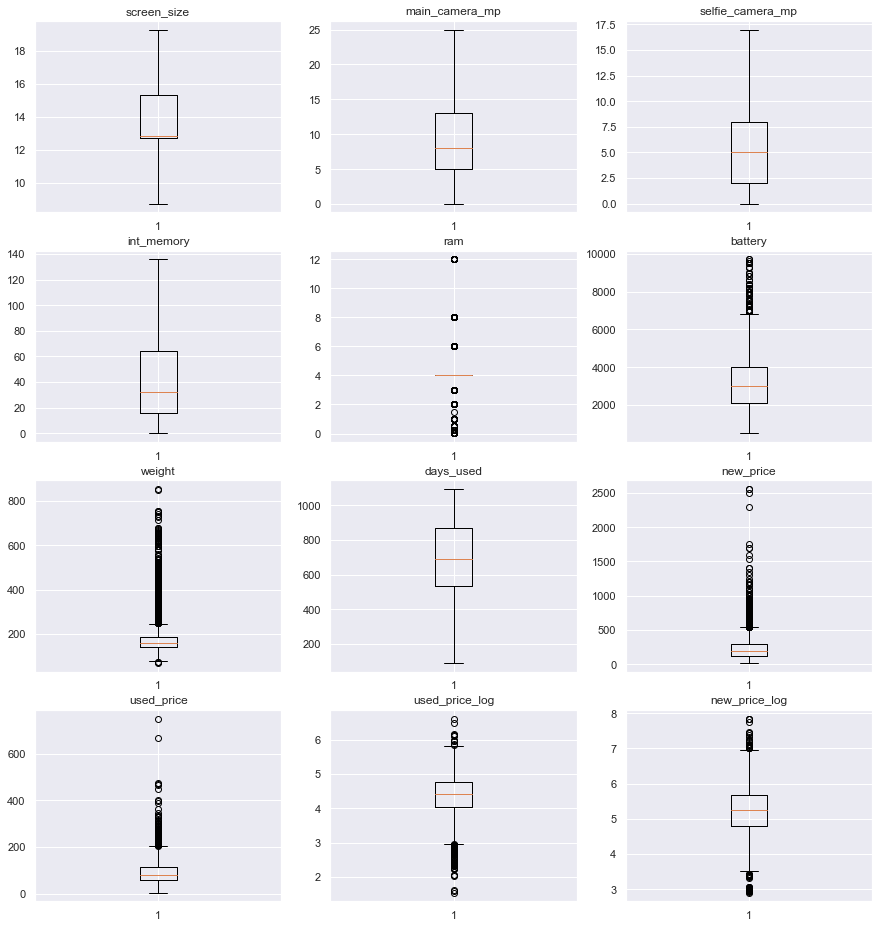

In [50]:
plt.figure(figsize=(15, 50))

for i, variable in enumerate(numeric_columns):
    plt.subplot(12, 3, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.title(variable)

plt.show()

In [51]:
df2.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
used_price_log      0
new_price_log       0
dtype: int64

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3454 non-null   float64
 6   selfie_camera_mp  3454 non-null   float64
 7   int_memory        3454 non-null   float64
 8   ram               3454 non-null   float64
 9   battery           3454 non-null   float64
 10  weight            3454 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
 15  used_price_log    3454 non-null   float64
 16  new_price_log     3454 non-null   float64


## Data Prep for Modeling

- Normalize used price using used_price_log, define independent and dependent variables
- Encode categorical variables and turn them into dummy variables
- Create a test/train split on the data before we create our model

In [53]:
X = df2.drop(["used_price", "used_price_log", "new_price"], axis=1)
y = df2["used_price_log"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        19.30  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  new_price_log  
0        127       4.715100  
1        325       5.519018  
2        162       5.884631  
3        345       5.630961  
4        293       4.947837  

0    4.

In [54]:
X.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price_log       0
dtype: int64

In [55]:
X = sm.add_constant(X)

In [56]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
) 

X = X.astype(float)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020.0,127.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020.0,325.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020.0,162.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,19.30,13.0,8.0,64.0,6.0,7250.0,480.0,2020.0,345.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020.0,293.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=1)

In [58]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [59]:
x_train.isnull().sum()

const                    0
screen_size              0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
new_price_log            0
brand_name_Alcatel       0
brand_name_Apple         0
brand_name_Asus          0
brand_name_BlackBerry    0
brand_name_Celkon        0
brand_name_Coolpad       0
brand_name_Gionee        0
brand_name_Google        0
brand_name_HTC           0
brand_name_Honor         0
brand_name_Huawei        0
brand_name_Infinix       0
brand_name_Karbonn       0
brand_name_LG            0
brand_name_Lava          0
brand_name_Lenovo        0
brand_name_Meizu         0
brand_name_Micromax      0
brand_name_Microsoft     0
brand_name_Motorola      0
brand_name_Nokia         0
brand_name_OnePlus       0
brand_name_Oppo          0
brand_name_Others        0
brand_name_Panasonic     0
brand_name_Realme        0
b

In [60]:
x_train = sm.add_constant(x_train)

x_test = sm.add_constant(x_test)

# EDA

- It is a good idea to explore the data once again after manipulating it.

In [61]:
df2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.551595,2.807499,8.74,12.7,12.83,15.34,19.3
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.586329,4.572418,0.08,5.0,8.0,13.0,25.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,5.96242,5.345927,0.0,2.0,5.0,8.0,17.0
int_memory,3454.0,NaN,NaN,NaN,44.694079,39.079988,0.01,16.0,32.0,64.0,136.0
ram,3454.0,NaN,NaN,NaN,4.03262,1.368598,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3132.577446,1298.884193,500.0,2100.0,3000.0,4000.0,9720.0


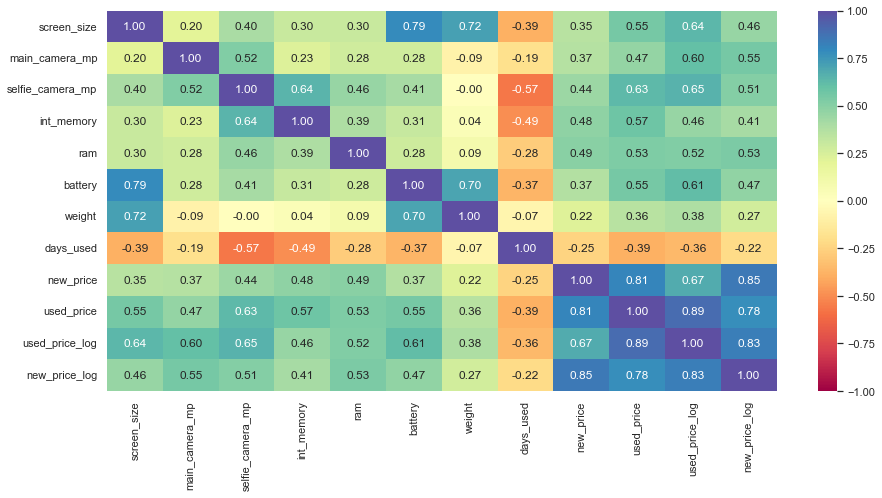

In [62]:
cols_list = df2.select_dtypes(include=np.number).columns.tolist()

cols_list.remove("release_year") # dropping release_year because it's a date

plt.figure(figsize=(15, 7))
sns.heatmap(
    df2[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

## Building a Linear Regression model

In [63]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     276.0
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:38:49   Log-Likelihood:                 151.31
No. Observations:                2417   AIC:                            -204.6
Df Residuals:                    2368   BIC:                             79.10
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -25.99

## Model performance evaluation

In [64]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)
    
    # taking the exponential of target and predictors so we judge performance on initial data and not log version
    target = np.exp(target)
    pred = np.exp(pred)

    r2 = r2_score(target, pred)  # R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  #adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # RMSE
    mae = mean_absolute_error(target, pred)  # MAE
    mape = mape_score(target, pred)  # MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [65]:
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,24.498958,16.257579,0.804918,0.80088,18.590709


In [66]:
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,24.253636,16.544556,0.789343,0.778885,19.411777


The r-squared and adj. r-squared on the training data is greater than that on the testing data. While the difference is only about 1-2%, this shows that there is some slight overfitting occurring.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

These are the assumptions I'm checking for:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

## Test for Multicollinearity

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    
    return vif

In [68]:
checking_vif(x_train)

,feature,VIF
0,const,4.254522e+06
1,screen_size,4.467370e+00
2,main_camera_mp,2.542906e+00
3,selfie_camera_mp,3.979971e+00
4,int_memory,2.498472e+00
5,ram,2.224085e+00
6,battery,4.017405e+00
7,weight,4.397369e+00
8,release_year,5.496928e+00
9,days_used,2.671061e+00


In [69]:
cols = x_train.columns.tolist() 

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train[cols] 

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'release_year', 'new_price_log', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', '4g_yes', '5g_yes']


In [70]:
x_train1 = x_train[selected_features]
x_test1 = x_test[selected_features]

In [71]:
olsmodel2 = sm.OLS(y_train, x_train1).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     828.3
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:38:52   Log-Likelihood:                 137.82
No. Observations:                2417   AIC:                            -241.6
Df Residuals:                    2400   BIC:                            -143.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -21.4979      8.01

In [72]:
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train1, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,24.666923,16.352233,0.802234,0.800833,18.70982


In [73]:
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test1, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,24.103249,16.466806,0.791948,0.788477,19.338349


## Test for Linearity and Independence

In [74]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()
df_pred["Fitted Values"] = olsmodel2.fittedvalues.values
df_pred["Residuals"] = olsmodel2.resid.values

df_pred.head(20)

,Actual Values,Fitted Values,Residuals
0,4.087488,3.828051,0.259437
1,4.448399,4.654832,-0.206432
2,4.315353,4.303635,0.011718
3,4.282068,4.190733,0.091335
4,4.456438,4.507339,-0.050901
5,3.043570,3.258869,-0.215299
6,4.238445,4.658310,-0.419865
7,4.726591,4.567795,0.158796
8,4.426044,4.269991,0.156052
9,3.189653,3.214883,-0.025230


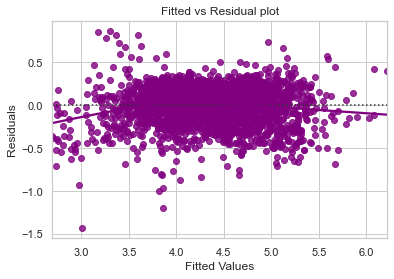

In [75]:
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

While there does appear to be a small amount of non-linearity to the plot, the curve looks to be fairly close to linear centered around 0 so I will accept this assumption of linearity.

## Test for Normality

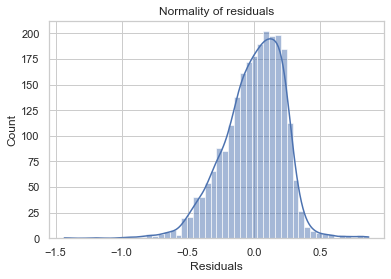

In [76]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

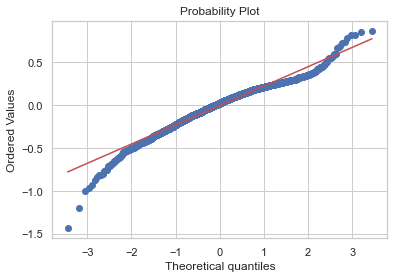

In [77]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [78]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9705737233161926, pvalue=7.199775709771131e-22)

Because the p-value is above .05 we are able to say that the residuals follow a normal distribution.

## Test for Homoscedasticity

In [79]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train1)
lzip(name, test)

[('F statistic', 1.0532481819531343), ('p-value', 0.1853523867900177)]

Because the p-value is above .05 we are able to say that the results are homoscedastic.

## Final Model Summary

In [80]:
olsmodel2_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,24.666923,16.352233,0.802234,0.800833,18.70982


In [81]:
olsmodel2_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,24.103249,16.466806,0.791948,0.788477,19.338349


In [82]:
# The equation of our linear regression model
Equation = "used price ="
print(Equation, end=" ")
for i in range(len(x_train1.columns)):
    if i == 0:
        print(olsmodel2.params[i], "+", end=" ")
    elif i != len(x_train1.columns) - 1:
        print(
            olsmodel2.params[i],
            "* (",
            x_train1.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmodel2.params[i], "* (", x_train1.columns[i], ")")

used price = -21.497912529504678 + 0.03305269581506807 * ( screen_size ) +  0.023831682498752012 * ( main_camera_mp ) +  0.017940106689076144 * ( selfie_camera_mp ) +  0.0005129368463427245 * ( int_memory ) +  0.0267803829874932 * ( ram ) +  -1.88674315360455e-05 * ( battery ) +  0.0011774834522774134 * ( weight ) +  0.011238531282519755 * ( release_year ) +  0.4029746870423768 * ( new_price_log ) +  0.043122611597760194 * ( brand_name_Lenovo ) +  0.09500427241741508 * ( brand_name_Nokia ) +  -0.06296468210494494 * ( brand_name_Sony ) +  0.06574627200440639 * ( brand_name_Xiaomi ) +  -0.09363592179811747 * ( os_Others ) +  0.044141582792255496 * ( 4g_yes ) +  -0.06319967007072691 * ( 5g_yes )


## Actionable Insights and Recommendations

- We were able to create a model that is able to explain 80% of the variation in used phone prices on the training data, and we also see that our model explains 80% of the variation in the testing data as well so we can be confident that this model doesn't suffer from overfitting.
- The most important factors in predicting the price of a used phone are the camera quality, internal memory and ram, screen size and weight, release year and new price. There are additional factors included in our model, those being certain brands and functionalities (operating system, 4g capability) which can have a meaningful impact on our prediction for the phone price. In general, phones that are larger, newer, initially more expensive, and more techonologically advanced (better camera, more memory) will resell for a higher price.
- The next steps for this project should be to create a system where our prediction for a used phone's selling price is compared to what the original owner is offering us the device for. If their price is meaningfully lower than our predicted price, we'll know there's a high likelihood that we can turn a profit on that unit.